In [1]:
import os
import sys
import pickle
import re
import seaborn as sns
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from sklearn.neighbors import KNeighborsRegressor #like KNN, but for continuous data
from sklearn import preprocessing
import joblib
from sklearn.metrics import accuracy_score

In [2]:
df= pd.read_csv("tracks.csv")
df.columns
df.describe()
df.info()
df.isnull().sum()
df = df.dropna(how='any', axis=0)
df

df[df.duplicated()].sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

id                    0
name                  0
popularity            0
duration_ms           0
explicit              0
artists               0
id_artists            0
release_date          0
danceability        0.0
energy              0.0
key                   0
loudness            0.0
mode                  0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
time_signature        0
dtype: object

In [4]:
def parse_date(date):
    try:
        return pd.to_datetime(date, format="%Y-%m-%d", errors='coerce')
    except:
        try:
            return pd.to_datetime(date, format="%Y", errors='coerce')
        except:
            return pd.NaT

df['release_date'] = df['release_date'].apply(parse_date)

# Drop rows where the 'release_date' could not be parsed
df = df.dropna(subset=['release_date'])

df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month_name()

# The rest of your code remains unchanged


#WE are checking for duplicate values

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month_name()
df


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,release_month
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1922,February
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1922,June
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922,March
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922,March
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,...,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3,1922,March
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2020,September
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2020,October
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,2020,September
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2021,March


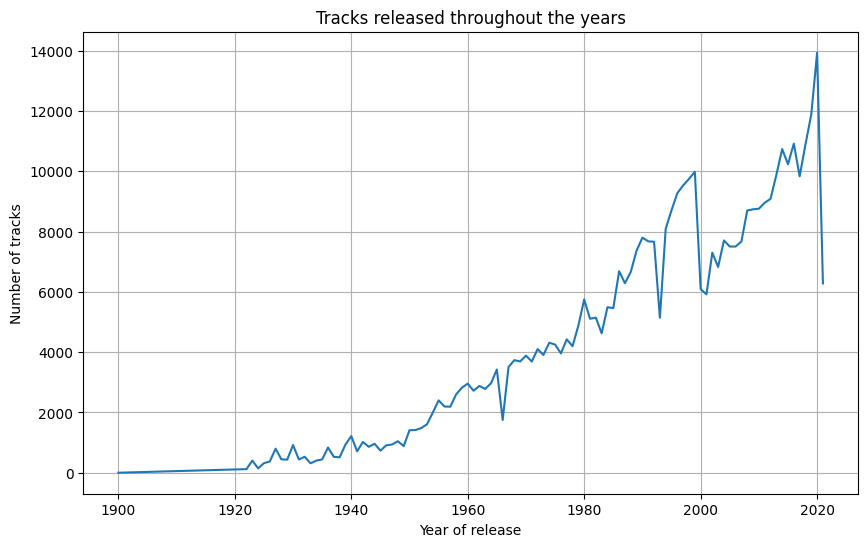

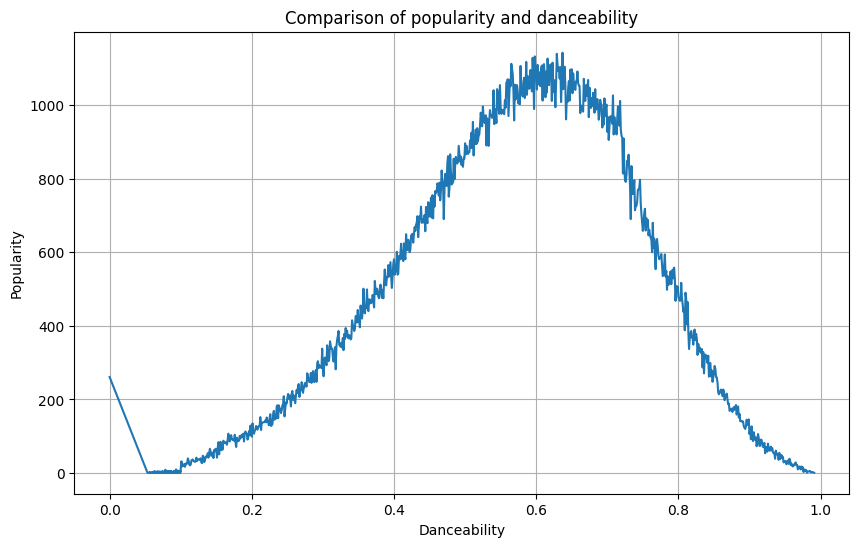

In [7]:
import matplotlib.pyplot as plt

# Code to create 'number_of_tracks_by_year'
number_of_tracks_by_year = df.groupby(df['release_year'])['name'].count().reset_index()
number_of_tracks_by_year['Tracks released'] = number_of_tracks_by_year['name']

# Replace Plotly line plot with matplotlib
plt.figure(figsize=(10, 6))
plt.plot(number_of_tracks_by_year['release_year'], number_of_tracks_by_year['Tracks released'])
plt.title("Tracks released throughout the years")
plt.xlabel("Year of release")
plt.ylabel("Number of tracks")
plt.grid(True)
plt.show()

# Code to create 'number_of_tracks'
number_of_tracks = df.groupby(df['danceability'])['name'].count().reset_index()
number_of_tracks['popularity'] = number_of_tracks['name']

# Replace Plotly line plot for danceability and popularity with matplotlib
plt.figure(figsize=(10, 6))
plt.plot(number_of_tracks['danceability'], number_of_tracks['popularity'])
plt.title("Comparison of popularity and danceability")
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.grid(True)
plt.show()


In [8]:
df=df.drop(columns='release_date')
month = {'January': 1,'February': 2 ,'March':3, "April":4, 'May':5, "June":6, 'July': 7, 'August':8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
  
# traversing through dataframe
# Gender column and writing
# values where key matches
df.release_month = [month[item] for item in df.release_month]
print(df)


df_quantitative = df
cols_to_drop = []
for column in df:
    if df[column].dtype == 'object':
        cols_to_drop.append(column)
df_quantitative = df.drop(columns=cols_to_drop)

df_quan_2016_unnormalized = df_quantitative[df_quantitative['release_year']>=2016] #so our songs are more recent
print(f"Working dataset shape: {df_quan_2016_unnormalized.shape}")

df_quan_2016_nm=(df_quan_2016_unnormalized-df_quan_2016_unnormalized.min())/(df_quan_2016_unnormalized.max()-df_quan_2016_unnormalized.min())

df_quan_2016_nm=df_quan_2016_nm.drop(columns='release_year')



np.random.seed(1) #so we can replicate results


                            id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
9       0JV4iqw2lSKJaHBQZ0e5zK        Martín Fierro - Remasterizado   
...                        ...                                  ...   
586667  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586668  0NuWgxEp51CutD2pJoF4OM                                blind   
586669  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586670  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586671  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6       126903         0                          ['

In [9]:
#creates a mask, randomly selects 80% of the songs
df_train_full = df_quan_2016_nm.sample(frac=0.8,random_state=1) #random state is a seed value
df_test = df_quan_2016_nm.drop(df_train_full.index)

df_validation = df_train_full.sample(frac=0.2,random_state=2) # create a validation set from training set
df_train = df_train_full.drop(df_validation.index)

# # seperate the data, the Y is what we want to predict
predict = "popularity"
X_train = df_train.drop(columns=[predict])
X_validation = df_validation.drop(columns=[predict])
X_test = df_test.drop(columns=[predict])

Y_train = df_train[[predict]].values.ravel() # .values.ravel() converts column vec. to 1d array
Y_validation = df_validation[[predict]].values.ravel()
Y_test = df_test[[predict]].values.ravel()

def calculate_error(Y_pred, Y_actual):
    error = 0
    for i in range(len(Y_pred)):
        error += abs(Y_pred[i] - Y_actual[i])**2
    return error / len(Y_pred)


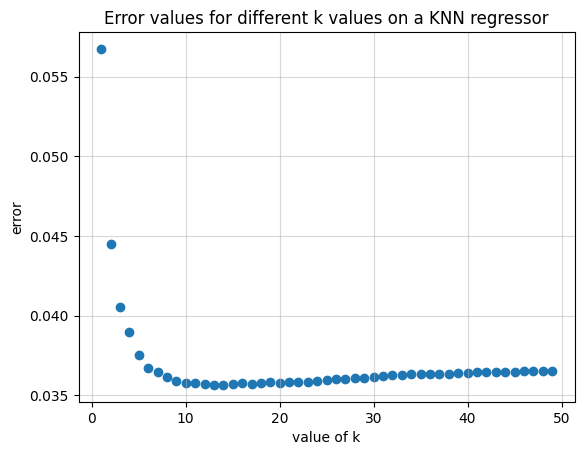

In [10]:
k_errors = [np.inf] # k=0 should have infinite error
for k in range(1,50):
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, Y_train) 
    Y_val_pred = model.predict(X_validation)
    k_errors.append(calculate_error(Y_val_pred, Y_validation))

plt.scatter(x=range(len(k_errors)), 
            y=k_errors)
plt.xlabel('value of k')
plt.ylabel('error')
plt.title('Error values for different k values on a KNN regressor')
plt.grid(axis='both',alpha=0.5)


plt.show()


In [11]:
k=7
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train, Y_train) 
Y_pred = model.predict(X_test)



print(f"Our testing error is {calculate_error(Y_pred, Y_test)}\n\n")

filename = 'trained_model.sav'
pickle.dump(model,open(filename,'wb'))
loaded_model = pickle.load(open('trained_model.sav','rb'))


Our testing error is 0.03628139531533927


